If it is stationary obtain the correlogram and fit an ARMA(p, q) model to the difference where,

> $p$ is the cut-off point to the **PACF**
 
> $q$ is the cut-off point to the **ACF**. 
  
This is an ARIMA(p,1,q) model to the original series.

**For an AR(p) process:** The PACF theoretically cuts off after lag p, because the partial correlation accounts for the effect of intervening lags.

**For an MA(q) process:** The ACF theoretically cuts off after lag q, as future values are not correlated with the error terms beyond lag q.

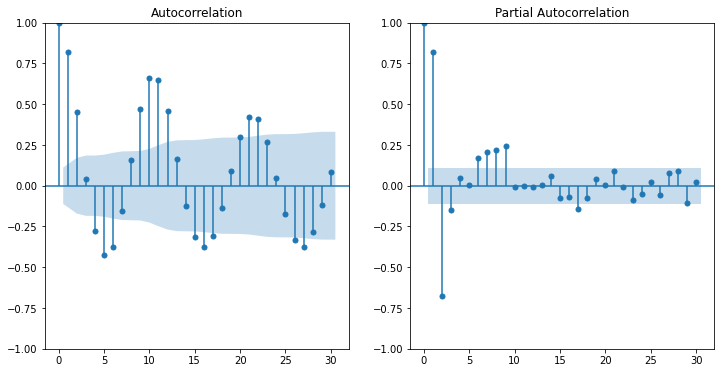

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Load the sunspots dataset
data = sm.datasets.sunspots.load_pandas().data

# Selecting the SUNACTIVITY time series
ts = data['SUNACTIVITY']

# Plot ACF and PACF
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(ts, ax=plt.gca(), lags=30)
plt.subplot(122)
plot_pacf(ts, ax=plt.gca(), lags=30)
plt.show()


In [45]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(ts)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.837781
p-value: 0.053076
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [46]:
df = pd.DataFrame([ts, ts.diff()]).transpose()
df = df.dropna()
df.columns = ["Sun Activity", "diff_1"]
df

,Sun Activity,diff_1
1,11.0,6.0
2,16.0,5.0
3,23.0,7.0
4,36.0,13.0
5,58.0,22.0
...,...,...
304,40.4,-23.3
305,29.8,-10.6
306,15.2,-14.6
307,7.5,-7.7


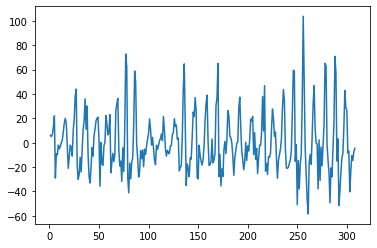

In [47]:
plt.plot(df["diff_1"])

In [48]:
adftest = adfuller(df["diff_1"])
adftest[1]  # p value < 0.05

1.715552423167157e-27

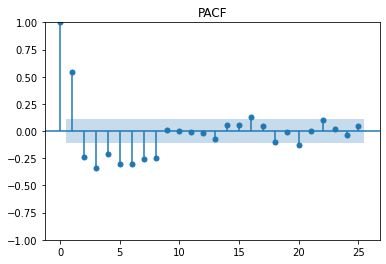

<Figure size 864x432 with 0 Axes>

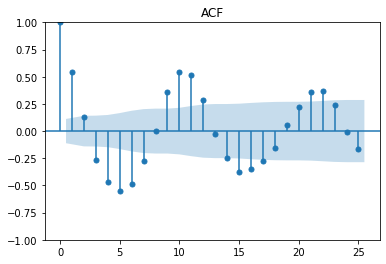

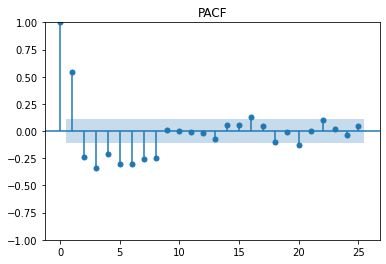

In [49]:
plt.figure(figsize=(12,6))
plot_acf(df["diff_1"], title="ACF")
plot_pacf(df["diff_1"], title="PACF")

This looks like an ARIMA(8, 1, 22) model.

In [50]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df["diff_1"], order=(8, 1, 22), trend="n")
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmod

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                  308
Model:                ARIMA(8, 1, 22)   Log Likelihood               -1253.727
Date:                Fri, 08 Dec 2023   AIC                           2569.454
Time:                        14:31:01   BIC                           2684.987
Sample:                             0   HQIC                          2615.655
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4765      0.172     -2.771      0.006      -0.814      -0.139
ar.L2         -0.4460      0.196     -2.278      0.023      -0.830      -0.062
ar.L3         -0.3324      0.194     -1.717      0.086      -0.712       0.047
ar.L4         -0.3491      0.128     -2.726      0.006      -0.600      -0.098
ar.L5         -0.4095      0.123     -3.343      0.001      -0.650      -0.169
ar.L6         -0.5773      0.165     -3.495      0.000      -0.901      -0.254
ar.L7         -0.3844      0.188     -2.043      0.041      -0.753      -0.016
ar.L8         -0.7549      0.176     -4.278      0.000      -1.101      -0.409
ma.L1         -0.3130      0.324     -0.966      0.334      -0.948       0.322
ma.L2         -0.2791      0.327     -0.852      0.394      -0.921       0.363
ma.L3         -0.5505      0.263     -2.094      0.036      -1.066      -0.035
ma.L4         -0.0127      0.284     -0.045      0.964      -0.569       0.543
ma.L5          0.0320      0.282      0.113      0.910      -0.521       0.585
ma.L6          0.1469      0.291      0.504      0.614      -0.424       0.718
ma.L7         -0.0777      0.334     -0.233      0.816      -0.732       0.576
ma.L8          0.4230      0.426      0.994      0.320      -0.411       1.257
ma.L9         -0.4450      0.331     -1.344      0.179      -1.094       0.204
ma.L10         0.0519      0.171      0.304      0.761      -0.282       0.386
ma.L11        -0.0143      0.180     -0.079      0.937      -0.367       0.339
ma.L12         0.0757      0.174      0.436      0.663      -0.264       0.416
ma.L13        -0.2183      0.125     -1.743      0.081      -0.464       0.027
ma.L14        -0.0036      0.131     -0.028      0.978      -0.261       0.254
ma.L15         0.0443      0.129      0.344      0.731      -0.208       0.297
ma.L16         0.2306      0.127      1.815      0.070      -0.018       0.480
ma.L17         0.1185      0.173      0.684      0.494      -0.221       0.458
ma.L18        -0.2307      0.126     -1.834      0.067      -0.477       0.016
ma.L19        -0.0263      0.127     -0.206      0.837      -0.276       0.224
ma.L20        -0.1827      0.111     -1.649      0.099      -0.400       0.034
ma.L21        -0.0682      0.164     -0.416      0.677      -0.389       0.253
ma.L22         0.3060      0.133      2.294      0.022       0.045       0.567
sigma2       208.9961     55.842      3.743      0.000      99.548     318.444
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                49.09
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.59
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

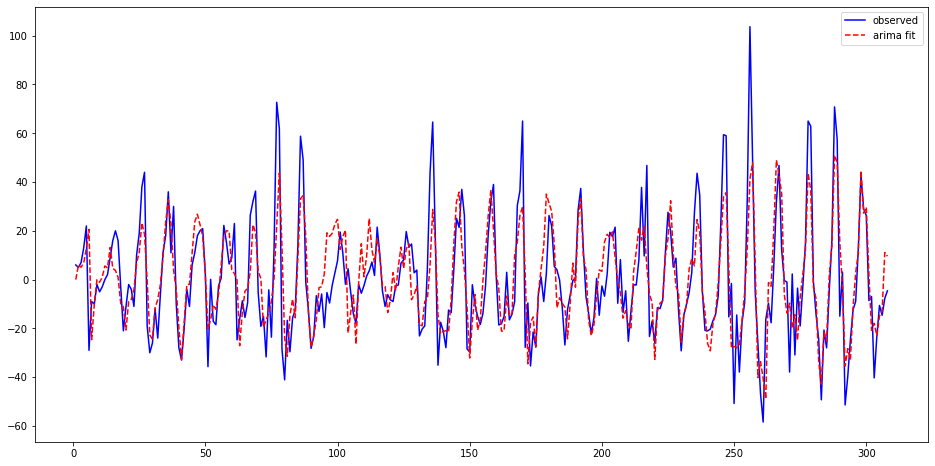

In [57]:
plt.figure(figsize=(16, 8))
plt.plot(df["diff_1"], "b", label="observed")
plt.plot(arima_model_fit.fittedvalues, "r--", label="arima fit")
plt.legend()